## Counts Overview
Here we take a summary of the number of proteins identified in each sample.

In [1]:
import load_data

data_raw=load_data.load_FragPipe(version="July_noMBR_FP", contains=[])

Here we load functions that will be used.

In [2]:
import matplotlib.pyplot as plt
from statistics import mean
import math
from numpy import isnan
import seaborn as sns

import numpy as np
import pandas as pd

Now we can get the number of non-zero values in each sample. Note that the "Blank" samples are supernatant samples, which are expected to have similar proteins. These are not studied in this project, but may be of interest in cellular verses extracellular protein.

In [3]:
counts = data_raw.apply(np.count_nonzero)
counts.sort_values()

Blank_5                          735
Blank_4                          788
Blank_3                          811
Subject1_B_cells_062920_C_11    1080
Subject1_B_cells_062920_C_13    1080
Subject1_T_cells_062920_D_12    1140
Subject2_B_cells_062920_E_12    1142
Subject1_T_cells_062920_D_13    1144
Subject1_T_cells_062920_D_10    1151
Subject2_B_cells_062920_E_13    1161
Subject1_B_cells_062920_C_9     1161
Subject2_B_cells_062920_E_16    1170
Subject1_T_cells_062920_D_9     1171
Subject2_B_cells_062920_E_11    1176
Subject2_T_cells_062920_F_12    1180
Subject2_T_cells_062920_F_14    1196
Subject2_B_cells_062920_E_9     1238
Subject1_B_cells_062920_C_10    1240
Subject2_T_cells_062920_F_13    1247
Subject2_T_cells_062920_F_9     1252
Subject1_T_cells_062920_D_11    1265
Subject2_T_cells_062920_F_11    1278
Subject1_T_cells_072920_D_5     1297
Subject2_T_cells_072920_F_3     1323
Subject1_B_cells_072920_C_4     1328
Subject1_B_cells_062920_C_12    1332
Subject2_T_cells_072920_F_8     1335
S

In [4]:
counts.drop(['Blank_5','Blank_4','Blank_3'], inplace=True)
print("Overall mean:\t",mean(counts))

samples=np.array(data_raw.columns.values)

cell_types = ["1_B_cells_062920","1_B_cells_072920", "2_B_cells_062920",  "2_B_cells_072920",
              "1_T_cells_062920","1_T_cells_072920","2_T_cells_062920", "2_T_cells_072920"]
for cell_type in cell_types:
    cells_of_type = list(s for i,s in enumerate(samples) if cell_type in s)
    print(cell_type,'mean:\t',mean(counts[cells_of_type]))

Overall mean:	 1318.4883720930231
1_B_cells_062920 mean:	 1178.6
1_B_cells_072920 mean:	 1426.2
2_B_cells_062920 mean:	 1177.4
2_B_cells_072920 mean:	 1560.8333333333333
1_T_cells_062920 mean:	 1174.2
1_T_cells_072920 mean:	 1375
2_T_cells_062920 mean:	 1253.6666666666667
2_T_cells_072920 mean:	 1358.5


Here we visualized that same data for clarity. To improve the bar plot, we will assign a color to each type to make the replicates more distinct.

In [5]:
cell_types = ['062920','072920']
cell_types = ["1_B_cells_062920","1_B_cells_072920", "2_B_cells_062920",  "2_B_cells_072920",
              "1_T_cells_062920","1_T_cells_072920","2_T_cells_062920", "2_T_cells_072920"]

colors = ['#0066ff','orange','#0066ff','orange','#0066ff','orange','#0066ff','orange','#0066ff']
samples=np.array(data_raw.columns.values)

color_by_type = []
for cell_type in cell_types:
    cells_of_type = list(s for i,s in enumerate(samples) if cell_type in s)
    
    for c in cells_of_type:
        color_by_type.append(colors[0])
    colors.pop(0)
    

Text(0, 0.5, 'Number of proteins')

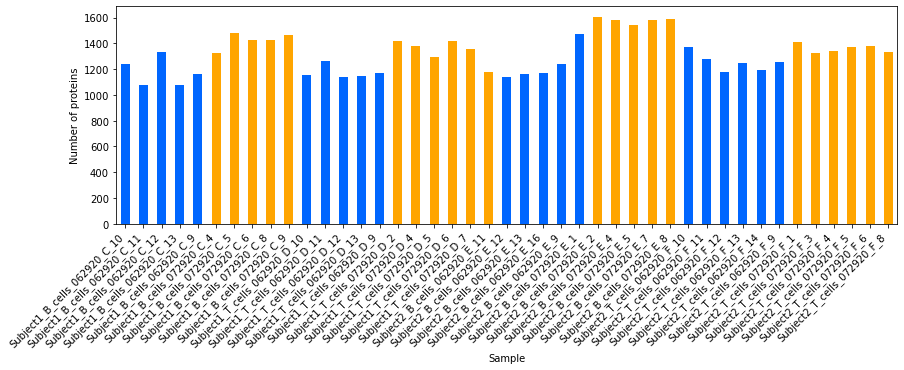

In [6]:
fig = counts.plot(kind='bar', color=color_by_type, figsize=(14,4))
plt.setp(fig.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.xlabel("Sample")
plt.ylabel("Number of proteins")
#plt.show()
#plt.savefig('data/figures/protein_counts_lymph.png', dpi=300, bbox_inches='tight')